# Linear Regression with Scikit-learn

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [29]:
# Dataset from Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

cols = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 
        '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'YrSold', 'SalePrice']

data = pd.read_csv('../datasets/housing_data.csv', usecols=cols)
data.shape

(1460, 10)

In [30]:
data.dropna(inplace=True)
data.shape

(1201, 10)

In [31]:
data.head(10)

,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,YrSold,SalePrice
0,65.0,8450,7,2003,856,856,854,1710,2008,208500
1,80.0,9600,6,1976,1262,1262,0,1262,2007,181500
2,68.0,11250,7,2001,920,920,866,1786,2008,223500
3,60.0,9550,7,1915,756,961,756,1717,2006,140000
4,84.0,14260,8,2000,1145,1145,1053,2198,2008,250000
5,85.0,14115,5,1993,796,796,566,1362,2009,143000
6,75.0,10084,8,2004,1686,1694,0,1694,2007,307000
8,51.0,6120,7,1931,952,1022,752,1774,2008,129900
9,50.0,7420,5,1939,991,1077,0,1077,2008,118000
10,70.0,11200,5,1965,1040,1040,0,1040,2008,129500


In [32]:
data.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,YrSold,SalePrice
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,70.049958,9951.698585,6.122398,1970.580350,1059.384679,1158.437968,346.073272,1511.132390,2007.802664,180770.480433
std,24.284752,7924.353975,1.419216,31.750335,448.307125,386.257235,435.143451,529.928171,1.330486,83389.519866
min,21.000000,1300.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,334.000000,2006.000000,34900.000000
25%,59.000000,7420.000000,5.000000,1950.000000,784.000000,876.000000,0.000000,1134.000000,2007.000000,127500.000000
50%,69.000000,9262.000000,6.000000,1972.000000,990.000000,1082.000000,0.000000,1456.000000,2008.000000,159500.000000
75%,80.000000,11249.000000,7.000000,2003.000000,1309.000000,1383.000000,728.000000,1768.000000,2009.000000,213500.000000
max,313.000000,215245.000000,10.000000,2010.000000,6110.000000,4692.000000,2065.000000,5642.000000,2010.000000,755000.000000


array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'YrSold'}>],
       [<AxesSubplot:title={'center':'SalePrice'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

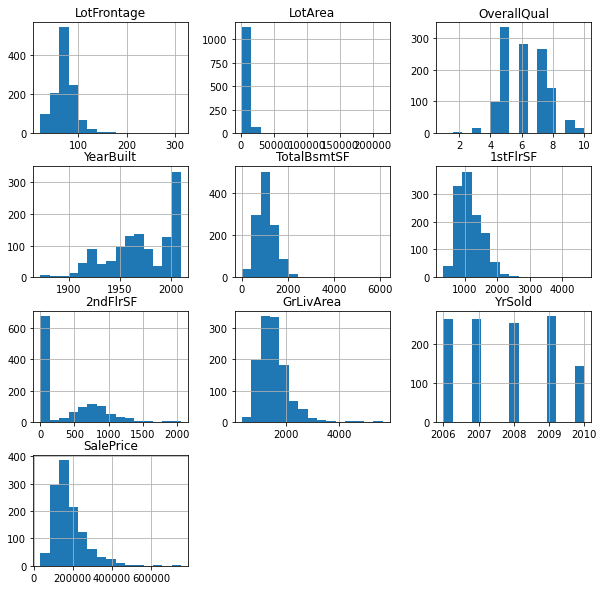

In [33]:
data.hist(figsize=(10,10), bins=15)

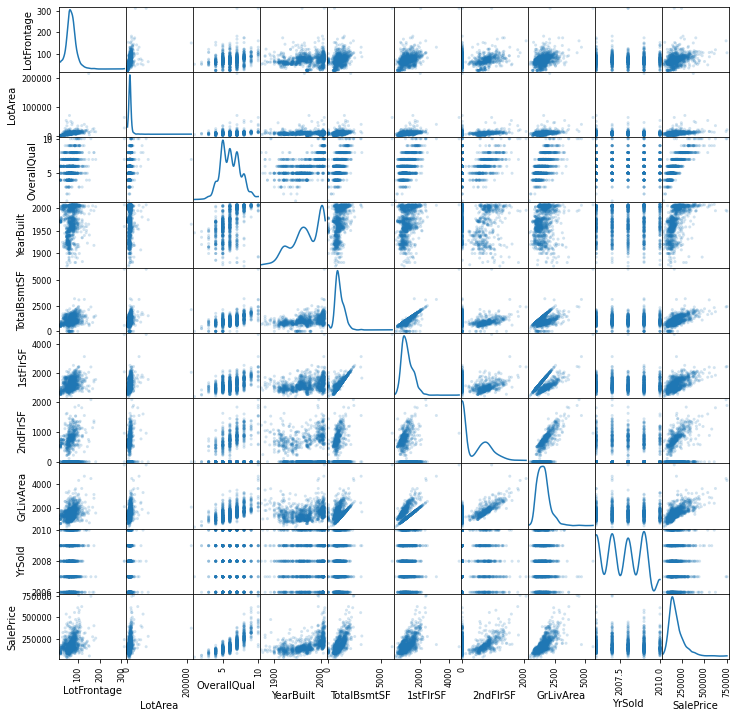

In [34]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(12, 12), diagonal="kde")
print()

Text(0.5, 1.0, 'Corelation Matrix')

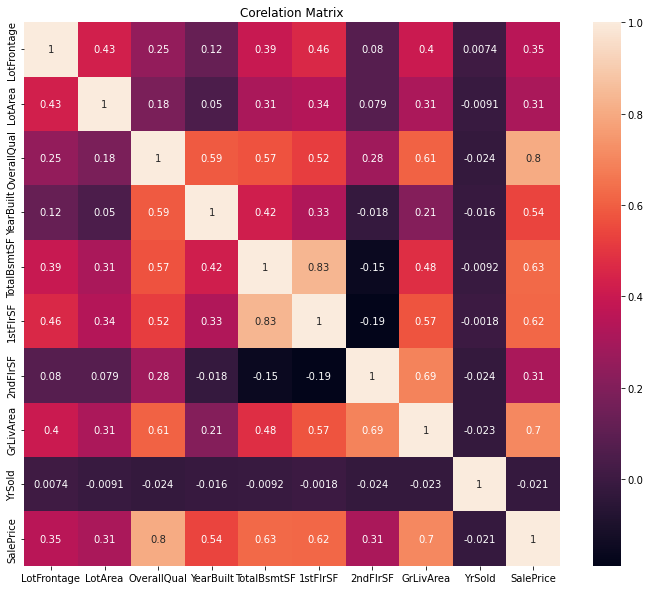

In [35]:
plt.figure(figsize=(12, 10))
corr_map = sns.heatmap(data.corr(), annot=True)
corr_map.set_title('Corelation Matrix')

<AxesSubplot:title={'center':'Square Footage Box Plots'}>

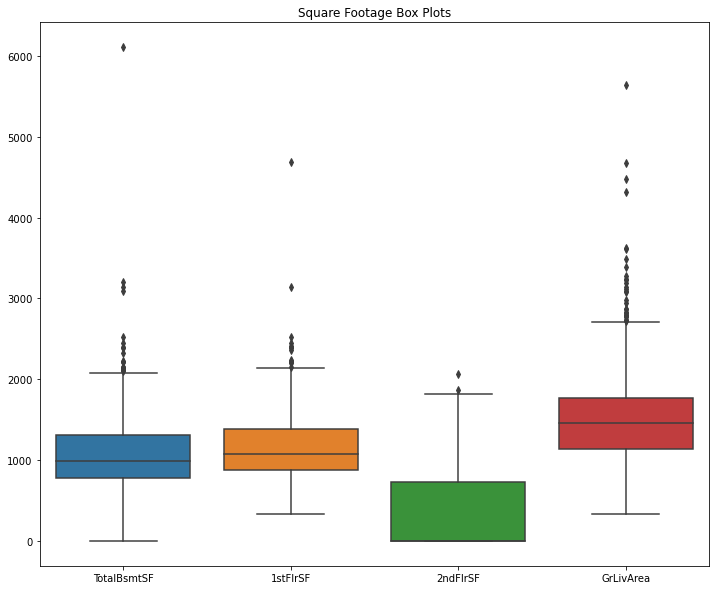

In [36]:
plt.figure(figsize=(12, 10))
plt.title('Square Footage Box Plots')
sns.boxplot(data=data[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']])

In [37]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [38]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

coefficents = pd.DataFrame(np.insert(linreg.coef_, 0, linreg.intercept_), columns=['Coefficients'])
coefficents.index = ['x_' + str(i) for i in range(len(coefficents))]
coefficents

,Coefficients
x_0,-2.893331e+06
x_1,1.352537e+02
x_2,1.431885e+00
x_3,2.121466e+04
x_4,4.219899e+02
x_5,3.475559e+01
x_6,3.859248e+01
x_7,3.683484e+01
x_8,1.941389e+01
x_9,9.791925e+02


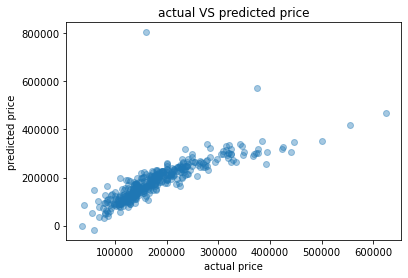

In [39]:
y_pred = linreg.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.title('actual VS predicted price')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [40]:
y_pred = linreg.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: $', round(mse, 2), sep='')

Mean Absolute Error: $26641.81


In [41]:
compare = pd.DataFrame({'actual price':y_test, 'predicted price': np.round(y_pred).astype(int), 
                        'absolute error': np.round(abs(y_test-y_pred)).astype(int)})
compare.head(15)

,actual price,predicted price,absolute error
0,252000,265672,13672
1,235000,212527,22473
2,160000,166471,6471
3,178000,201696,23696
4,167500,148599,18901
5,179000,153327,25673
6,125000,114090,10910
7,123000,109711,13289
8,172500,189518,17018
9,138000,172324,34324


In [42]:
compare[['absolute error']].describe()

,absolute error
count,397.000000
mean,26641.831234
std,39829.462645
min,294.000000
25%,9155.000000
50%,18901.000000
75%,33568.000000
max,644161.000000


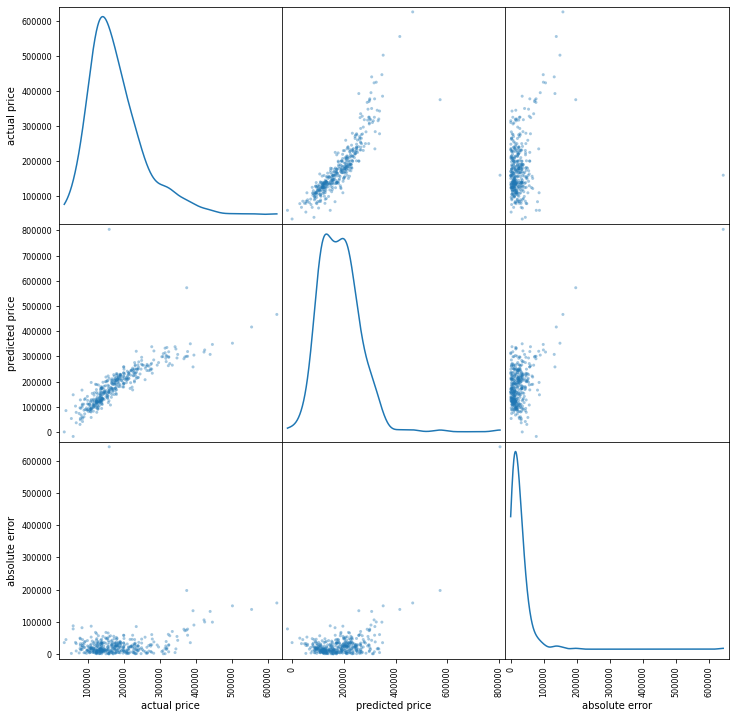

In [43]:
scatter = pd.plotting.scatter_matrix(compare, alpha=0.4, figsize=(12, 12), diagonal="kde")